# WEEK 14 (8/01/18)

### Done
* Produce ODMs at different scales $\checkmark$
* Make heatmaps of epsilon at different scales $\checkmark$
* Streamline clustering process with easier to use functions $\checkmark$
* Change centroid to population-weighted centroid (CoM) $\checkmark$

### To Do
* Cluster different cities
* Create visualisation for whole clusters at different levels
* Derivation of epsilon with different masses


### Questions
* Find how epsilon varies with the rescaling $\rightarrow$ can we find a critical point?
* In particular, how does epsilon vary with the cophonetic distance?
* How should we determine the clustering levels (log, linear,etc.)?
* Would it make more sense to substract the original (= clustering level 0) (reduced = combined) ODM to the clustered ODM at each level to find $\epsilon$ as opposed to subtracting the ODM of the previous clustering level each time?

### Meeting
* Now have 3 variables: M (mass in cluster), size of cluster L and distance between locations/clusters l_ij
* Try to find measure to reduce matrix and identify patterns for epsilon

### Clustering Routine
To make it easier to perform clustering on the area of interest, we now have a module (eps_scale.py) which streamlines all the steps to **iteratively cluster the locations and produce the relative ODMs**.

We can then use its functions to output the matrices and plot them using heatmaps, together with the epsilon matrix $ E$, at the desired level of clustering.

This way we can apply our analysis to different areas in the UK and see if we observe the same **scaling behaviour**.

We'll start from London, for now just with the gravity model (the same analysis can then be applied on the radiation model with minimal changes). One idea for studying the behaviour of epsilon could be finding the **cophonetic distance that minimises the mean value of $\epsilon$**.
It would then be interesting to see if there is some sort of **critical point** after which we observe self-similarity, in analogy with the **renormalisation group** in stat mech.

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from hm.analysis.scaling import eps_scale
from hm.coarse_grain import clustering
from hm.coarse_grain.coarse_matrix import epsilon_matrix
from matplotlib import pyplot as plt
import pandas
import seaborn as sns; sns.set()

### London

In [34]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/CDRC/england_welsh_scotland_pwc2011.csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


First, let's compare what we get by using the centroids vs. the PW-centroids.

**_Issue here_**

We have two different options for creating levels:

1. Start from the same population distribution and create levels by increasing the cophonetic distance
2. Redefine the population distribution each time and explicitly assign centroids/PW-centroids to each location and create levels by running the clustering algorithm on these distributions

*Pros/Cons*:
1. Can easily keep track of which cluster the initial locations fall within
2. More control over centroids, as these are explitly defined

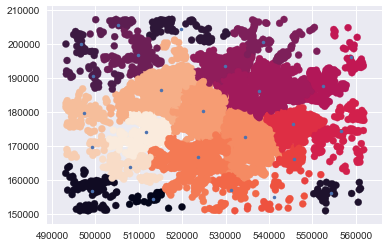

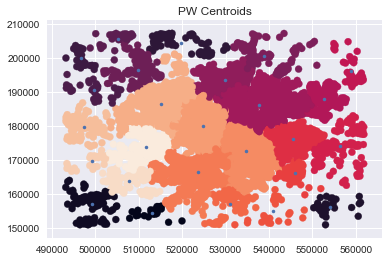

In [62]:
clusters = eps_scale.iterate(lon_df, 10000, 3, pw = True)[0]
plt.plot(clusters.pw_centroids()[0], clusters.pw_centroids()[1], '.')
clusters.viz_clusters()
plt.title("PW Centroids")

clusters = eps_scale.iterate(lon_df, 10000, 3, pw = False)[0]
plt.plot(clusters.centroids()[0], clusters.centroids()[1], '.')
clusters.viz_clusters()
plt.title("Centroids")

Essentially the difference is negligible, it only becomes significant when we start applying the clustering algorithm on locations defined by our PW centroids each time:

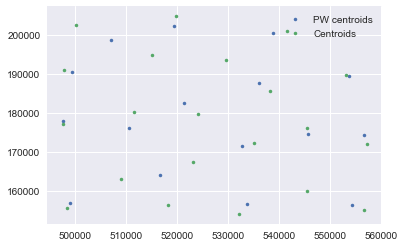

In [54]:
clusters = eps_scale.iterate(lon_df, 5000, 4, pw = True)[-1]
plt.plot(clusters.pw_centroids()[0], clusters.pw_centroids()[1], '.', label=  "PW centroids")

clusters = eps_scale.iterate(lon_df, 5000, 4, pw = False)[-1]
plt.plot(clusters.pw_centroids()[0], clusters.pw_centroids()[1], '.', label = "Centroids")
plt.legend()
plt.show()

Let's compare the ODMs for the combined flow between the locations (first fig.) with the flow between the clustered locations (second fig.):

In [36]:
eps_scale.iterate(lon_df, 5000, 2, pw = True)[1].clusters_num

44

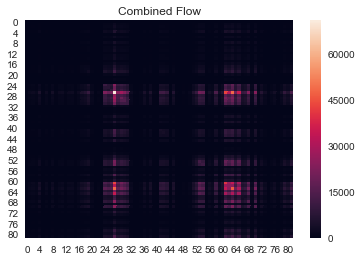

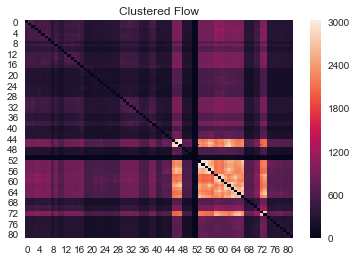

In [10]:
sns.heatmap(eps_scale.reduced_ODM(eps_scale.lon_df, 5000, 0))
plt.title("Combined Flow")
plt.show()
sns.heatmap(eps_scale.reordered_ODM(eps_scale.lon_df, 5000, 1))
plt.title("Clustered Flow")
plt.show()

Substracting these two ODMs (and dividing by the clustered flow) gives the epsilon matrix:

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


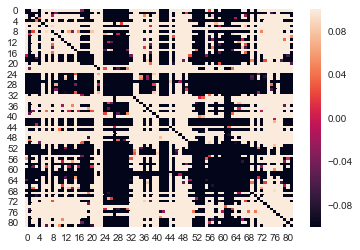

In [17]:
sns.heatmap(eps_scale.epsilon(eps_scale.lon_df, 5000, 0))
plt.show()

#### Centroids

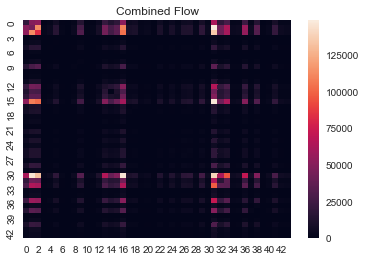

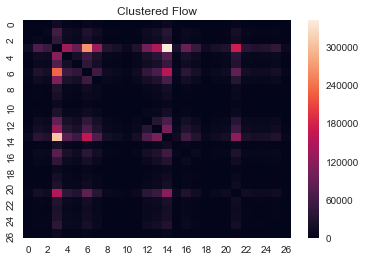

In [56]:
sns.heatmap(eps_scale.reduced_ODM(lon_df, 5000, 2))
plt.title("Combined Flow")
plt.show()
sns.heatmap(eps_scale.gravity_ODM(lon_df, 5000, 3))
plt.title("Clustered Flow")
plt.show()

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


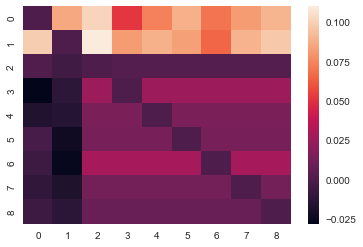

In [68]:
sns.heatmap(eps_scale.epsilon(lon_df, 5000, 7))
plt.show()

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


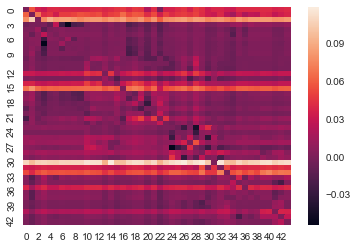

In [65]:
sns.heatmap(eps_scale.epsilon(lon_df, 5000, 2))
plt.show()

#### PW Centroids

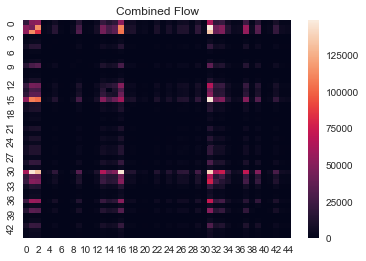

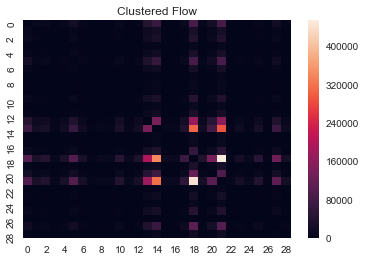

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


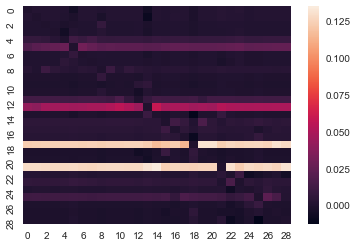

In [61]:
sns.heatmap(eps_scale.reduced_ODM(lon_df, 5000, 2))
plt.title("Combined Flow")
plt.show()
sns.heatmap(eps_scale.gravity_ODM(lon_df, 5000, 3))
plt.title("Clustered Flow")
plt.show()
sns.heatmap(eps_scale.epsilon(lon_df, 5000, 3))
plt.show()